In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
import sys
sys.path.append('/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/src/MA_Diffusion_base_trajectory_prediction')

from utils.data_utils import TDRIVE, GEOLIFE, load_data, calculate_bbox_and_filter, \
    plot_coordinates, plot_paths, load_new_format, find_cycles, split_cycle_in_paths, \
    plot_histograms_before_after_split, \
    get_edge_used_by_trajectories, modify_and_save_data

# Data Loading

In [4]:
# WHICH = TDRIVE
# Paths to cleaned and filtered data
GEOLIFE_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/geolife.h5'
TDRIVE_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/tdrive.h5'
MUNICH_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/munich.h5'
# pNEUMA dataset is not in the correct format yet
PNEUMA_PATH = '/ceph/hdd/students/schmitj/MA_Diffusion_based_trajectory_prediction/data/pNEUMA.h5'
# merged_path = GEOLIFE_PATH if WHICH == GEOLIFE else TDRIVE_PATH

In [6]:
paths, node_coord, edges = load_new_format(PNEUMA_PATH)

100%|██████████| 10336/10336 [00:16<00:00, 617.16it/s]


In [10]:
print(paths[:1])

[{'coordinates': array([[0.5699498 , 0.40487685],
       [0.56984753, 0.40480014],
       [0.56997537, 0.40454445],
       [0.56989866, 0.40459559],
       [0.56989866, 0.40482571],
       [0.56984753, 0.40446774],
       [0.56992423, 0.40449331],
       [0.56979639, 0.40449331],
       [0.56250903, 0.40329153],
       [0.5673417 , 0.39827988],
       [0.52571427, 0.42448879],
       [0.52072818, 0.45460987],
       [0.48270608, 0.4821484 ],
       [0.36334685, 0.58583343],
       [0.31803738, 0.60590562],
       [0.32862323, 0.6488371 ],
       [0.31957156, 0.58723976],
       [0.35204505, 0.57021036],
       [0.517174  , 0.57557999],
       [0.74528105, 0.56558225],
       [0.75361677, 0.57982456],
       [0.75364234, 0.5798757 ],
       [0.7535912 , 0.5799524 ],
       [0.75361677, 0.57979899],
       [0.75354006, 0.57997797],
       [0.7348742 , 0.55599362],
       [0.76420261, 0.48447525],
       [0.7624383 , 0.37378413],
       [0.73536002, 0.37235223],
       [0.73354457, 0.3581

In [13]:
paths, node_coordinates, edges = load_new_format(TDRIVE_PATH)
# edge_coordinates = node_coordinates[edges]

100%|██████████| 7218/7218 [00:12<00:00, 591.86it/s]


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
print()

In [22]:
# Number of Edges
num_edges = len(edges)
print("Number of Edges:", num_edges)

# Number of Nodes
num_nodes = len(node_coordinates)
print("Number of Nodes:", num_nodes)

# Distribution of Path Lengths
path_lengths = [len(path['edge_idxs']) for path in paths]

avg_length = round(sum(path_lengths) / len(path_lengths), 2)
print(f"Average length: {avg_length} edges")

path = np.random.randint(len(paths))
print(f'Exemplary Path: {path}')
print(paths[path])
print('\nCoordinates:')
#print(paths[path]['coordinates'])
print('\nTimestamps:')
#print(paths[path]['timestamps'])
print('\nTaxi Index:')
#print(paths[path]['taxi_idx'])
print('\nEdge Indexes:')
print(paths[path]['edge_idxs'])
9og

Number of Edges: 1378
Number of Nodes: 825
Average length: 6.9 edges
Exemplary Path: 115478
{'edge_idxs': array([518, 890, 563, 577, 582, 569, 636, 639, 622]), 'edge_orientation': array([1, 0, 0, 1, 0, 1, 0, 1, 0]), 'num_observations_per_edge': array([ 5, 31, 16, 20, 18, 15, 26,  9, 26]), 'raw_idx_to_edge_idx': array([ 518,  518,  518,  518,  518,  890,  890,  890,  890,  890,  890,
        890,  890,  890,  890,  890,  890,  890,  890,  890,  890,  890,
        890,  890,  890,  890,  890,  890,  890,  890,  890,  890,  890,
        890,  890,  890,  563,  563,  563,  563,  563,  563,  563,  563,
        563,  563,  563,  563,  563,  563,  563,  563,  577,  577,  577,
        577,  577,  577,  577,  577,  577,  577,  577,  577,  577,  577,
        577,  577,  577,  577,  577,  577,  582,  582,  582,  582,  582,
        582,  582,  582,  582,  582,  582,  582,  582,  582,  582,  582,
        582,  582,  569,  569,  569,  569,  569,  569,  569,  569,  569,
        569,  569,  569,  569,

  0%|          | 0/4 [00:00<?, ?it/s]


KeyError: 'coordinates'

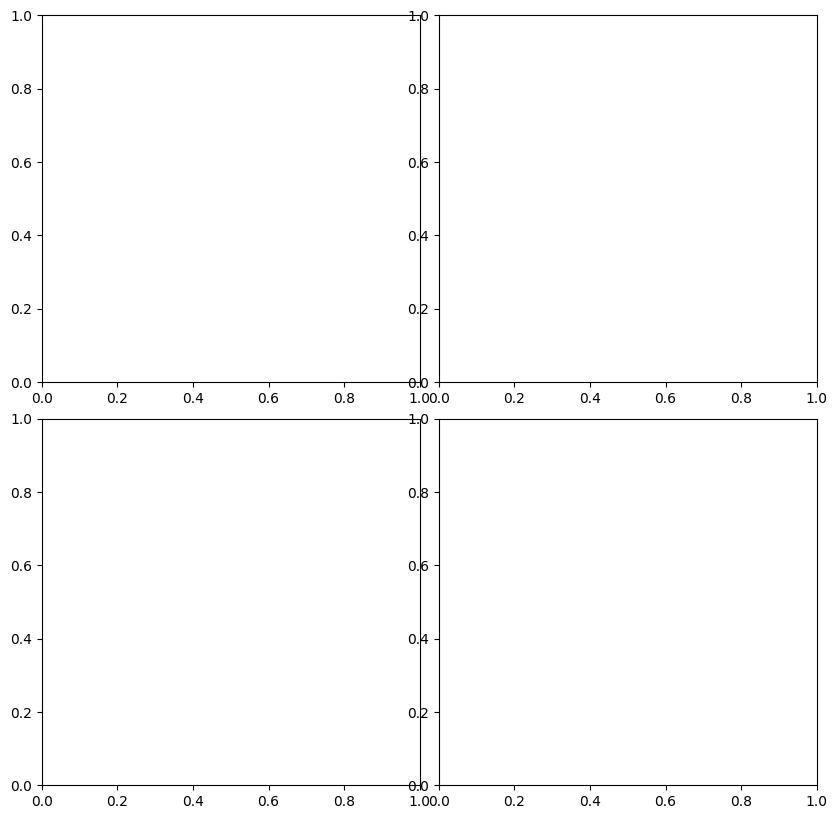

In [16]:
plot_paths(paths, node_coordinates, edges, num_paths_to_plot=4, random=False, start_id=path)

# Filtering

## Cycle Filtering

In [17]:
cycles = find_cycles(paths)
print("Number of paths with cycles:", np.sum(cycles))

  0%|          | 0/173770 [00:00<?, ?it/s]

100%|██████████| 173770/173770 [00:03<00:00, 45532.42it/s]

Number of paths with cycles: 3180


### Plot Paths with Cycles

  0%|          | 0/4 [00:00<?, ?it/s]


KeyError: 'coordinates'

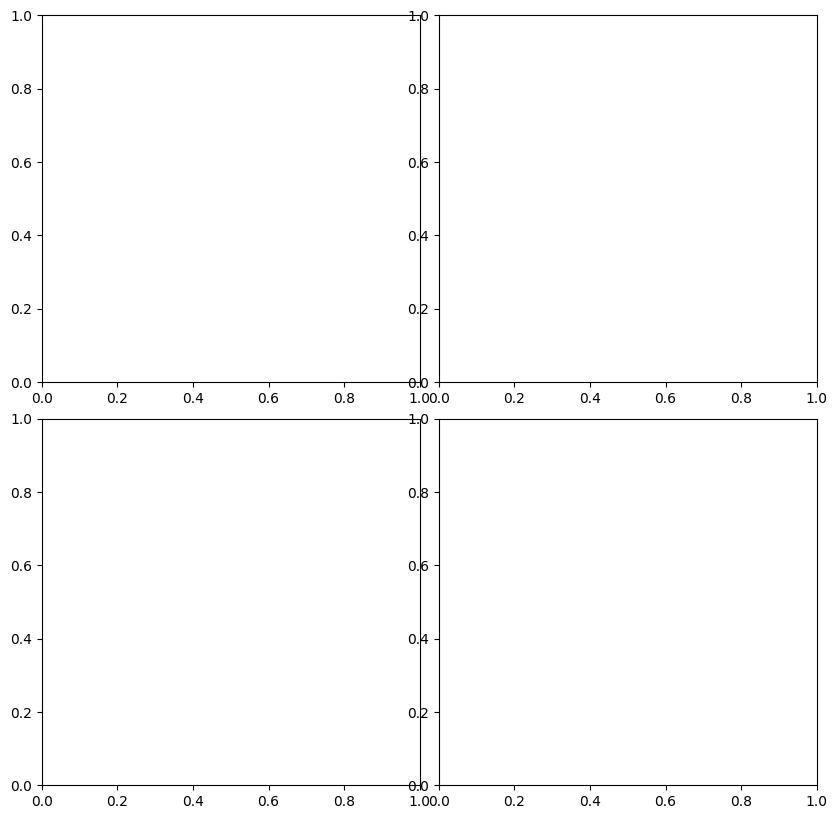

In [18]:
paths_with_cycles = list(path for path, mask in zip(paths, cycles) if mask)
plot_paths(paths_with_cycles, node_coordinates, edges)

### Split paths with cycles

In [19]:
split_paths = split_cycle_in_paths(paths)
print(
    f"Number of paths before split: {len(paths)}, after split: {len(split_paths)}, ratio: {len(split_paths) / len(paths)}")
print("Number of paths with cycles after split:", np.sum(find_cycles(split_paths)))

  0%|          | 0/173770 [00:00<?, ?it/s]


KeyError: 'edge_observation_ranges'

### Plot Splitted Paths

100%|██████████| 4/4 [00:01<00:00,  3.87it/s]


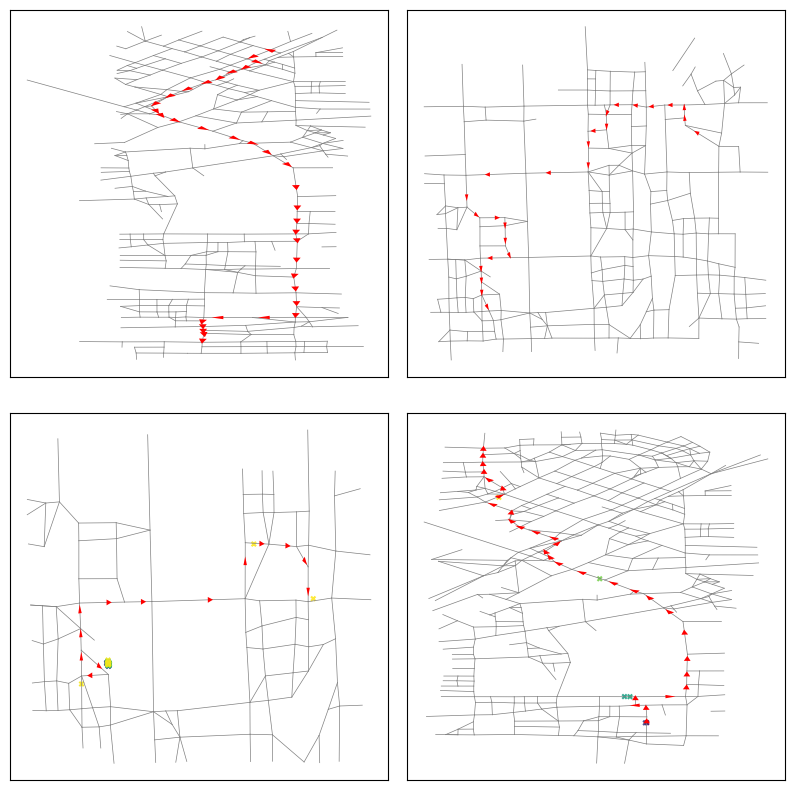

In [ ]:
plot_paths(split_paths, node_coordinates, edges)

## Remove Short Paths (<5 edges)

In [20]:
num_edges_before_split = np.array([len(path['edge_idxs']) for path in paths])
num_edges_after_split = np.array([len(path['edge_idxs']) for path in split_paths])
print(
    f"Number of paths smaller than 5 before split: {np.sum(num_edges_before_split < 5)} out of {len(num_edges_before_split)}, ratio: {np.sum(num_edges_before_split < 5) / len(num_edges_before_split)}")
print(
    f"Number of paths smaller than 5 after split: {np.sum(num_edges_after_split < 5)} out of {len(num_edges_after_split)}, ratio: {np.sum(num_edges_after_split < 5) / len(num_edges_after_split)}")

NameError: name 'split_paths' is not defined

In [45]:
path_length_cutoff_value = 5
longer_paths = [path for path in split_paths if len(path['edge_idxs']) >= path_length_cutoff_value]
print(
    f"Number of paths longer than {path_length_cutoff_value}: {len(longer_paths)} out of {len(split_paths)}, ratio: {len(longer_paths) / len(split_paths)}")

Number of paths longer than 5: 7218 out of 7218, ratio: 1.0
